<a href="https://colab.research.google.com/github/eubrunoread/InvestigaDados/blob/main/notebook/Transcri%C3%A7%C3%A3o_com_Whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOLUÇÃO PARA TRANSCRIÇÃO DE ARQUIVOS DE MIDIA UTILIZANDO A NUVEM DO GOOGLE**
----
*Desenvolvido pelo Agente PCSC **Bruno Bevilaqua Lemos** como parte de um projeto pessoal de aprendizagem de Phyton, sugestões ou correções podem ser enviadas para bruno-lemos@pc.sc.gov.br*

----

*Para rodar código pressione CTRL+F9, ou vá clicando no botão 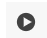 em cada célula.*

-----
Este código faz o upload, processamento e transcrição de arquivos de mídia (MP4,MPEG, MP3, OGG etc.) e transcreve utilizando o processamento em nuvem pelo Google (ideal para quem tem PC da Xuxa), gerando um arquivo TXT com o conteúdo.

###**Fluxo geral:**

1. O usuário faz upload dos arquivos de mídia (pode se transcrever multiplos arquivos ao mesmo tempo).

2. O script lê, processa e transcreve.

3. A transcrição é gerada e salva em um arquivo TXT que pode ser baixado.


In [ ]:
%%capture
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg
from google.colab import files

#**Upload dos arquivos**

Clique no botão escolher arquivos e selecione, os arquivos de audio ou vídeo para transcrever.

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Upload do arquivo "{name}" com o tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

#**Configure o modelo de transcrição**
A configuração é padrão "medium", você pode trocar para "small", "medium" ou "large". Quanto maior o modelo maior a qualidade e maior o tempo necessário para a transcrição.

In [ ]:
# Configuração do modelo
modelo = "medium"
arquivo = list(uploaded.keys())[0]

In [ ]:
# Lista para armazenar os nomes dos arquivos gerados
arquivos_gerados = []

# Processar cada arquivo
for arquivo in uploaded.keys():
    print(f'\nProcessando o arquivo: {arquivo}')
    arquivo_saida = f"{arquivo.rsplit('.', 1)[0]}_transcricao.txt"

    # Comando para transcrição
    !whisper "{arquivo}" --model {modelo} --task transcribe --language pt --output_format txt --output_dir "." > "{arquivo_saida}"

    # Lendo e exibindo o conteúdo do arquivo gerado
    with open(arquivo_saida, 'r', encoding='utf-8') as f:
        conteudo = f.read()
        print("\nConteúdo da transcrição:")
        print(conteudo)

    print(f'Transcrição de "{arquivo}" salva em: {arquivo_saida}')

    arquivos_gerados.append(arquivo_saida)

## **Download do Arquivo**

In [ ]:
 for arquivo in arquivos_gerados:
    files.download(arquivo)